# Task 1: GWAS of insomnia
We are going to explore output of a GWAS of insomnia (Lane et al., 2019; https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6415688/)    
Download the statistics: wget https://personal.broadinstitute.org/ryank/Saxena_fullUKBB_Insomnia_summary_stats.zip   
Download the README file: wget https://s3.amazonaws.com/broad-portal-resources/sleep/Saxena_fullUKBB_Insomnia_summary_stats_README  
read the README file,
unzip the summary stats file and load in python

In [ ]:
! wget https://personal.broadinstitute.org/ryank/Saxena_fullUKBB_Insomnia_summary_stats.zip  
! wget https://s3.amazonaws.com/broad-portal-resources/sleep/Saxena_fullUKBB_Insomnia_summary_stats_README  

In [ ]:
import numpy as np
import pandas as pd

UKIso = pd.read_csv('Saxena_fullUKBB_Insomnia_summary_stats.zip', sep=' ')
print(UKIso.columns)
display(UKIso)

Index(['SNP', 'CHR', 'BP', 'ALLELE1', 'ALLELE0', 'A1FREQ', 'INFO',
       'BETA_INSOMNIA', 'SE_INSOMNIA', 'P_INSOMNIA'],
      dtype='object')


,SNP,CHR,BP,ALLELE1,ALLELE0,A1FREQ,INFO,BETA_INSOMNIA,SE_INSOMNIA,P_INSOMNIA
0,rs2462492,1,54676,C,T,0.599285,0.340158,-0.000056,0.002428,0.95
1,rs3107975,1,55326,T,C,0.991605,0.324228,0.020398,0.013604,0.12
2,1:70728_C_T,1,70728,C,T,0.997843,0.365713,0.033723,0.025031,0.19
3,rs143777184,1,79137,A,T,0.999539,0.480382,0.029229,0.048617,0.52
4,rs114608975,1,86028,T,C,0.896397,0.340885,0.002876,0.003877,0.44
...,...,...,...,...,...,...,...,...,...,...
14661596,rs376461333,22,51232488,A,G,0.979778,0.610305,-0.000205,0.006249,0.96
14661597,rs8138356,22,51234159,T,A,0.999439,0.662548,0.035724,0.040999,0.42
14661598,rs6010092,22,51234199,T,C,0.999852,0.902878,-0.075706,0.073932,0.35
14661599,rs3896457,22,51237063,T,C,0.701560,0.852165,0.001086,0.001633,0.51


1.1 How many SNPs were tested?

In [ ]:
#### ANSWER

#print("Number of tested SNPs:", len(UKIso))
print("Number of tested SNPs:", len(UKIso['SNP'].unique()))

Number of tested SNPs: 14639541


1.2 Find the most significant SNP. What is its rs identifier? What is its P-value?

In [ ]:
#### ANSWER

smallest = UKIso['P_INSOMNIA'].nsmallest(1)
UKIso.loc[UKIso['P_INSOMNIA'].isin(smallest)]
display(UKIso.loc[UKIso['P_INSOMNIA'].isin(smallest)])
print("rs identifier:", UKIso.loc[UKIso['P_INSOMNIA'].isin(smallest)]['SNP'].to_string(index=False))
print("P-value:", UKIso.loc[UKIso['P_INSOMNIA'].isin(smallest)]['P_INSOMNIA'].to_string(index=False))

,SNP,CHR,BP,ALLELE1,ALLELE0,A1FREQ,INFO,BETA_INSOMNIA,SE_INSOMNIA,P_INSOMNIA
1514582,rs113851554,2,66750564,G,T,0.942793,0.925487,-0.041374,0.003074,1.300000e-41


rs identifier:  rs113851554
P-value:  1.300000e-41


1.3 On which chromosome is it? What is its basepair location?    

In [ ]:
#### ANSWER

print("On chromosome:", UKIso.loc[UKIso['P_INSOMNIA'].isin(smallest)]['CHR'].to_string(index=False))
print("Basepair Location:", UKIso.loc[UKIso['P_INSOMNIA'].isin(smallest)]['BP'].to_string(index=False))

On chromosome:  2
Basepair Location:  66750564


1.4 The second top SNP is rs11679120. Using an online database: In which gene is this second top SNP?    

In [ ]:
#### ANSWER

smallest = UKIso['P_INSOMNIA'].nsmallest(2)
display(UKIso.loc[UKIso['P_INSOMNIA'].isin(smallest)])
print("For the second top SNP rs11679120:")
print("Databse: GWAS Catalog")
print("Gene: MEIS1")

,SNP,CHR,BP,ALLELE1,ALLELE0,A1FREQ,INFO,BETA_INSOMNIA,SE_INSOMNIA,P_INSOMNIA
1514582,rs113851554,2,66750564,G,T,0.942793,0.925487,-0.041374,0.003074,1.300000e-41
1514723,rs11679120,2,66785180,G,A,0.953404,0.932275,-0.042331,0.003369,2.300000e-36


For the second top SNP rs11679120:
Databse: GWAS Catalog
Gene: MEIS1


1.5 How come does the basepair location ("Position") of the SNP differs from the basepair location in the downloaded GWAS statistics?   

#### ANSWER

##### GWAS Catalog Online database location: 66558048 

Link: https://www.ebi.ac.uk/gwas/search?query=rs11679120

This happens due to the difference in the Genome Reference.

* GWAS may use a newer version (GRCh38.p13 release 13 in 2019/02/28)

* Whereas the GWAS statistics may use a different version (GRCh37 in 2009/02/27)

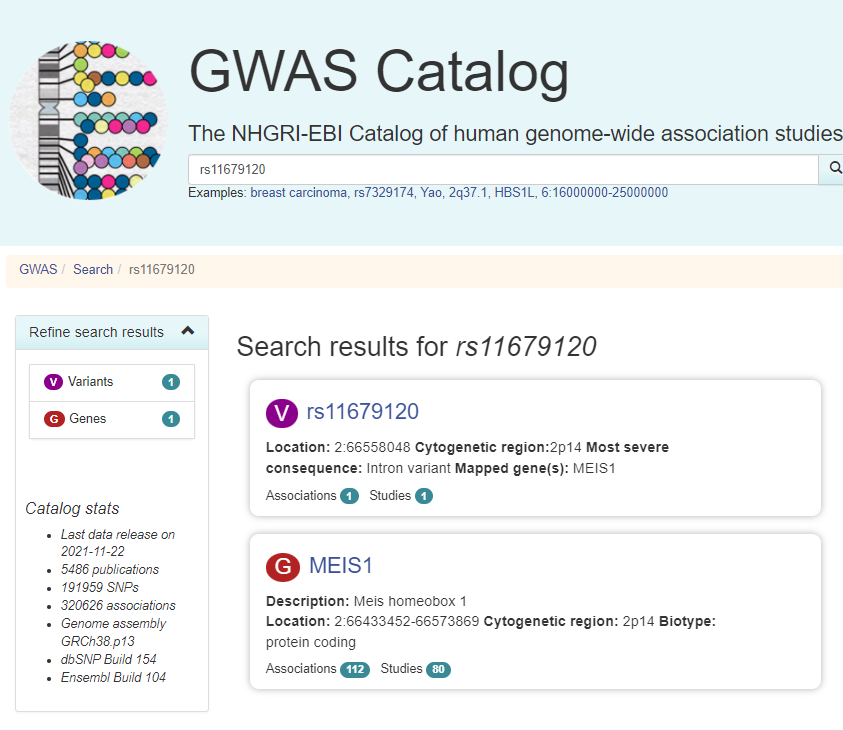



1.6 Where is this gene most expressed in the body? 

The gene is most expressed in:
1. Endometrium and adrenal (HPA RNA-seq normal tissues project)
2. Brain, cerebellum and uterus (RNA sequencing of total RNA from 20 human tissues project)
3. Ovary and prostate (Illumina bodyMap2 transcriptome project)


https://www.ncbi.nlm.nih.gov/gene/4211/?report=expression


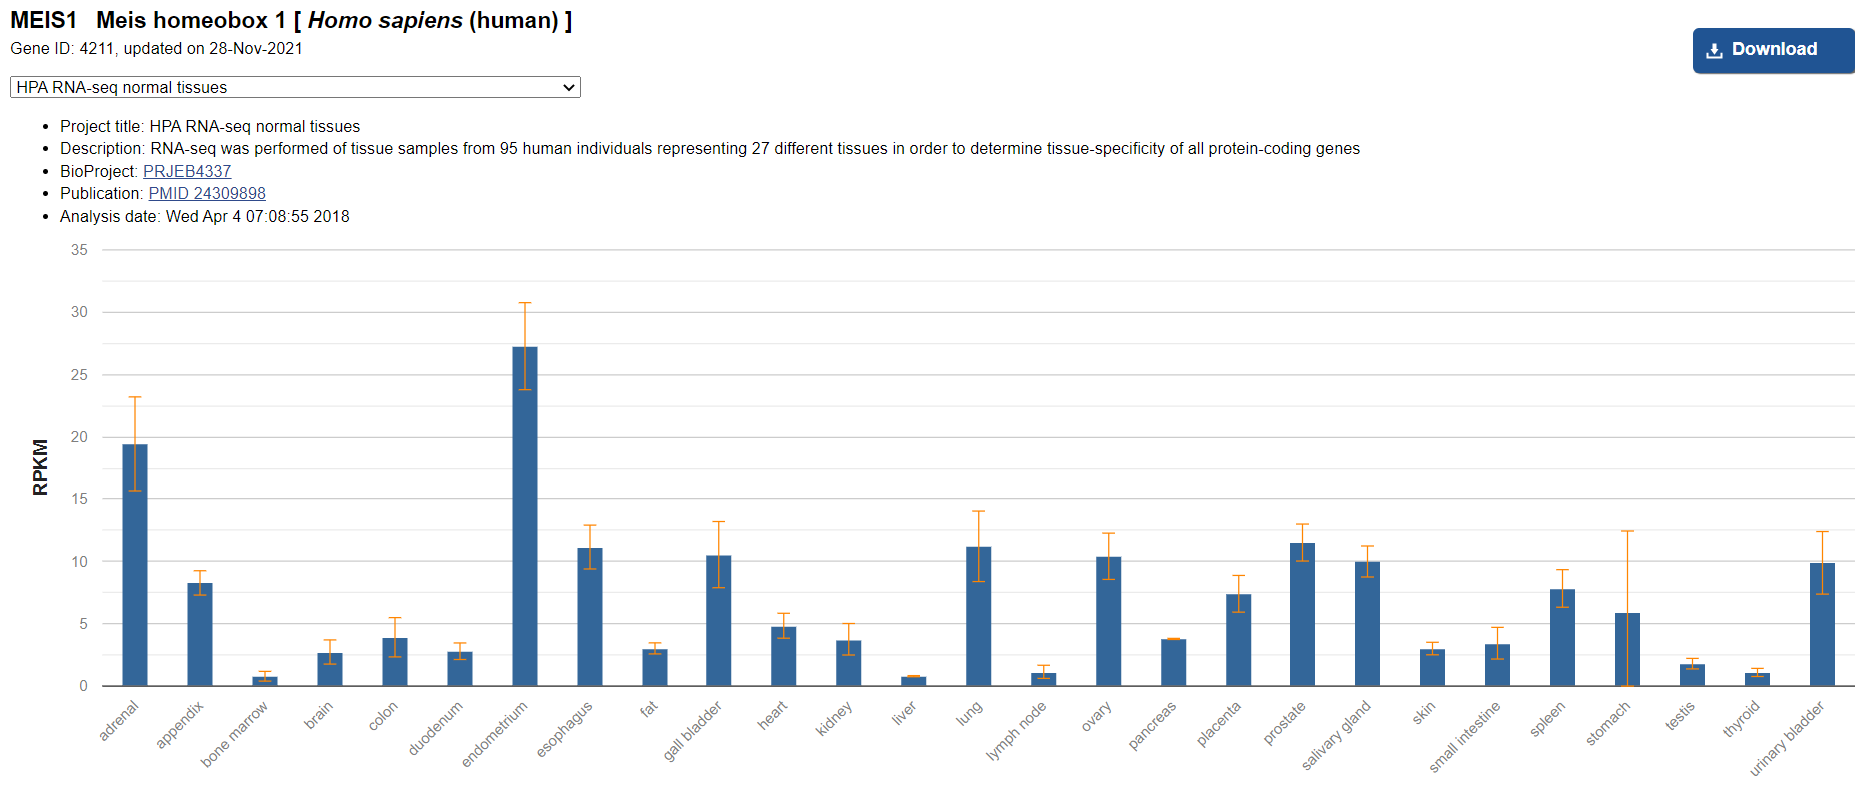

# Task 2: Mouse phenome database

For this first task, you will download and import some files from the Mouse Phenome Database (MPD, https://phenome.jax.org). This is a database containing a large amount of mouse experimental data, where information on several phenotypes/genotypes can be found.

Execute the wget commands to download the following files to the colab session

- measurements.csv (= Description, units, and other metadata attributes for all phenotype measures (traits) in MPD. One row per measure.)
- straininfo.csv (= Strain name, vendor, stock number, web page URL, MPD strain ID, and other attributes for each mouse strain in MPD. One row per strain.)
- strainmeans.csv.gz (= Strain averages, SD, SEM, N, CV for all numeric strain survey phenotype measures in MPD.)
- animaldatapoints.csv.gz (= Individual mouse readings for all strain survey phenotype measures. One row per animal reading.)




In [ ]:
! wget --no-check-certificate https://phenomedoc.jax.org/MPD_downloads/measurements.csv
! wget --no-check-certificate https://phenomedoc.jax.org/MPD_downloads/straininfo.csv
! wget --no-check-certificate https://phenomedoc.jax.org/MPD_downloads/strainmeans.csv.gz
! wget --no-check-certificate https://phenomedoc.jax.org/MPD_downloads/animaldatapoints.csv.gz

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind_from_stats as ttest

In [179]:
measurements = pd.read_csv('measurements.csv')
straininfo = pd.read_csv('straininfo.csv')
strainmeans = pd.read_csv('strainmeans.csv.gz')
animaldatapoints = pd.read_csv('animaldatapoints.csv.gz')

#measurements = pd.read_csv('measurements.csv', header=0,    sep=',', quotechar='"', error_bad_lines=False)
#straininfo = pd.read_csv('straininfo.csv', header=0,    sep=',', quotechar='"', error_bad_lines=False)
#strainmeans = pd.read_csv('strainmeans.csv.gz', compression='gzip', header=0,    sep=',', quotechar='"', error_bad_lines=False)
#animaldatapoints = pd.read_csv('animaldatapoints.csv.gz', compression='gzip', header=0,    sep=',', quotechar='"', error_bad_lines=False)

In [180]:
display(measurements.head(2))
display(straininfo.head(2))
display(strainmeans.head(2))
display(animaldatapoints.head(2))

,measnum,mpdsector,projsym,varname,descrip,units,method,intervention,paneldesc,datatype,sextested,nstrainstested,ageweeks
0,1401,css,Johnson1,age_yng,"age of younger group (local parameter),",d,colony observation,NaN,inbred,NaN,both,42.0,NaN
1,1402,css,Johnson1,click_yng,"auditory brainstem response (ABR) threshold, 3...",dB,ABR test,NaN,inbred,NaN,both,42.0,3-12wks


,strainname,vendor,stocknum,panel,mpd_strainid,straintype,n_proj,n_snp_datasets,mpd_shortname,mginum,url
0,BTBR T<+> Itpr3<tf>/J,J,002282,NaN,1,IN,100.0,5.0,NaN,MGI:2162761,http://jaxmice.jax.org/strain/002282.html
1,CAST/EiJ,J,000928,NaN,2,IWD,129.0,7.0,NaN,MGI:2159793,http://jaxmice.jax.org/strain/000928.html


,measnum,varname,strain,strainid,sex,mean,nmice,sd,sem,cv,minval,maxval,zscore
0,1401,age_yng,A/J,4,f,73.3,7.0,0.488,0.184,0.00666,73.0,74.0,1.04
1,1401,age_yng,DBA/2J,8,f,41.7,7.0,22.700,8.580,0.54400,24.0,74.0,-1.24


,measnum,strainid,sex,animal_id,measval,zscore,animal_projid
0,1401,4,f,191,73.0,-0.59,14
1,1401,4,f,192,73.0,-0.59,14



1. How many different mouse strains does the database have information on?

In [181]:
#### ANSWER

print("Number of mouse strain:", straininfo['strainname'].nunique())

Number of mouse strain: 4365


2. Which strain was used in the most projects, give the name and id



In [182]:
#### ANSWER

mp = straininfo['n_proj'].nlargest(1).index.values
smp = straininfo.loc[mp]
display(smp)
print("Strain Name:", smp['strainname'].to_string(index=False))
print("Strain ID :", smp['mpd_strainid'].to_string(index=False))

,strainname,vendor,stocknum,panel,mpd_strainid,straintype,n_proj,n_snp_datasets,mpd_shortname,mginum,url
6,C57BL/6J,J,000664,NaN,7,IN,280.0,10.0,NaN,MGI:3028467,http://jaxmice.jax.org/strain/000664.html


Strain Name:  C57BL/6J
Strain ID :  7


3. Using the measurements and strainmeans file, look up the experiment with measnum 29508. Give the description of the experiment and the average results for the strain from question 2. (**hint:** You should get two values, one for males and one for females)


In [183]:
#### ANSWER

ds29508 = strainmeans[strainmeans['measnum'] == 29508]
display(ds29508)
print("Description of the experiment", measurements[measurements['measnum'] == 29508]['descrip'].to_string(index=False))
print("Average results from strain", smp['strainname'].to_string(index=False))
#For female
ds29508f = ds29508[(ds29508 == 'C57BL/6J').any(axis=1)][(ds29508== 'f').any(axis=1)]
print('For female:', ds29508f['mean'].to_string(index=False))
#For male
ds29508m = ds29508[(ds29508 == 'C57BL/6J').any(axis=1)][(ds29508== 'm').any(axis=1)]
print('For male:', ds29508m['mean'].to_string(index=False))

,measnum,varname,strain,strainid,sex,mean,nmice,sd,sem,cv,minval,maxval,zscore
63141,29508,ejection_fraction,C57BL/6J,7,f,69.2,6.0,2.11,0.861,0.0304,67.1,72.0,0.10
63142,29508,ejection_fraction,BALB/cByJ,50,f,72.3,6.0,6.92,2.820,0.0956,65.7,83.4,0.95
63143,29508,ejection_fraction,C3HeB/FeJ,59,f,63.7,5.0,7.48,3.350,0.1180,56.1,75.7,-1.40
63144,29508,ejection_fraction,129S2/SvPas,840,f,70.1,6.0,3.63,1.480,0.0518,62.8,72.6,0.35
63145,29508,ejection_fraction,C57BL/6J,7,m,63.7,6.0,4.91,2.000,0.0771,56.1,70.4,-0.51
63146,29508,ejection_fraction,BALB/cByJ,50,m,71.7,6.0,6.36,2.600,0.0887,63.9,80.8,0.87
63147,29508,ejection_fraction,C3HeB/FeJ,59,m,59.9,6.0,6.45,2.630,0.1080,53.2,70.5,-1.16
63148,29508,ejection_fraction,129S2/SvPas,840,m,71.3,6.0,6.80,2.770,0.0952,61.8,81.2,0.80


Description of the experiment  cardiac ejection fraction, 
Average results from strain  C57BL/6J
For female:  69.2
For male:  63.7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


4. Lets do a bit of statistics, for the experiment above (29508) take the results from two strains, namely BALB/cByJ (id=50) and C3HeB/FeJ (id=59), and put the measured value into two numpy arrays. Plot the data and run a t-test to see if there is a difference between the strains. What is the p-value for this test? The values for individual mice can be found in the animaldatapoints.gz.csv file

,measnum,varname,strain,strainid,sex,mean,nmice,sd,sem,cv,minval,maxval,zscore
63143,29508,ejection_fraction,C3HeB/FeJ,59,f,63.7,5.0,7.48,3.35,0.118,56.1,75.7,-1.40
63147,29508,ejection_fraction,C3HeB/FeJ,59,m,59.9,6.0,6.45,2.63,0.108,53.2,70.5,-1.16


,measnum,varname,strain,strainid,sex,mean,nmice,sd,sem,cv,minval,maxval,zscore
63142,29508,ejection_fraction,BALB/cByJ,50,f,72.3,6.0,6.92,2.82,0.0956,65.7,83.4,0.95
63146,29508,ejection_fraction,BALB/cByJ,50,m,71.7,6.0,6.36,2.60,0.0887,63.9,80.8,0.87


Print Array
Numpy array for BALB/cByJ (id=50) [76.9 73.1 66.1 68.8 83.4 65.7 68.1 68.2 77.5 80.8 71.9 63.9]
Numpy array for C3HeB/FeJ (id=59), [59.  56.1 63.6 63.9 75.7 56.3 70.5 55.8 59.2 53.2 64.4]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Measured Value')

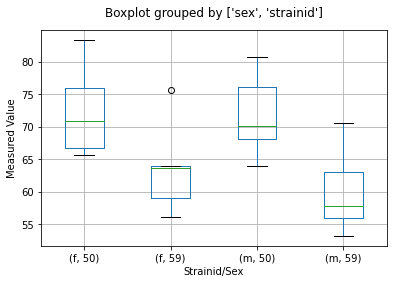

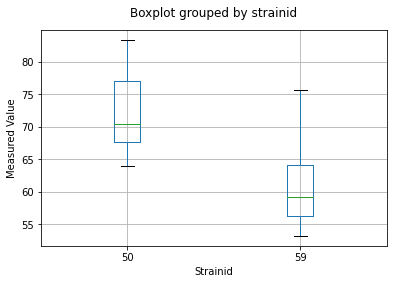

In [184]:
#### ANSWER

BALB = ds29508[(ds29508 == 'BALB/cByJ').any(axis=1)]
C3HeB = ds29508[(ds29508 == 'C3HeB/FeJ').any(axis=1)]
display(C3HeB)
display(BALB)

BAC3 = animaldatapoints[(animaldatapoints['measnum']==29508) &
                 ((animaldatapoints['strainid']==50) | (animaldatapoints['strainid']==59))]

#display(BAC3)
id50 = BAC3[BAC3['strainid']==50]['measval']
id59 = BAC3[BAC3['strainid']==59]['measval']

print("Print Array")
#display(pd.id50)
print("Numpy array for BALB/cByJ (id=50)", np.array(id50))
print("Numpy array for C3HeB/FeJ (id=59),", np.array(id59))

boxplot = BAC3.boxplot(column=['measval'], by=['sex','strainid'])
plt.title(' ')
plt.xlabel('Strainid/Sex')
plt.ylabel('Measured Value')


boxplot = BAC3.boxplot(column=['measval'], by=['strainid'])
plt.title(' ')
plt.xlabel('Strainid')
plt.ylabel('Measured Value')


In [187]:
#### ANSWER

from scipy.stats import ttest_ind

# Difference between the strains
print("With threshold of p-value < 0.05")
#print("There is a statistical difference between the strains")
print("Difference between the strains (not taking sex into account)")
print("p-value from t-test:", ttest_ind(id50, id59).pvalue)
print("There is statistical difference between the strains")

# Difference between the strains taken sex into account
print("Difference between the strains taken sex into account")
# Female
f50 = BAC3[(BAC3['strainid']==50) & (BAC3['sex']=='f')]['measval']
f59 = BAC3[(BAC3['strainid']==59) & (BAC3['sex']=='f')]['measval']
print("FEMALE")
print("Difference between the strains (Female)")
print("p-value from t-test:", ttest_ind(f50, f59).pvalue)
print("There is a no statistical difference between the female strains")

# Male
m50 = BAC3[(BAC3['strainid']==50) & (BAC3['sex']=='m')]['measval']
m59 = BAC3[(BAC3['strainid']==59) & (BAC3['sex']=='m')]['measval']
print("MALE")
print("Difference between the strains (Male)")
print("p-value from t-test:", ttest_ind(m50, m59).pvalue)
print("There is statistical difference between the male strains")

With threshold of p-value < 0.05
Difference between the strains (not taking sex into account)
p-value from t-test: 0.0010792595603904566
There is statistical difference between the strains
Difference between the strains taken sex into account
FEMALE
Difference between the strains (Female)
p-value from t-test: 0.07696109119791658
There is a no statistical difference between the female strains
MALE
Difference between the strains (Male)
p-value from t-test: 0.009495194801018693
There is statistical difference between the male strains


# Task 3: mouse fMRI

We have performed a mouse functional MRI experiment. In this experiment, the temporal signal fluctuations in the images are linked to spontaneous neuronal activity occuring over time in lightly-anesthetized mice. (https://pubmed.ncbi.nlm.nih.gov/26296501/)

We have correlated the signal fluctuations coming from a region-of-interst with that of every voxel (volume element) in the image to obtain a "functional connectivity map". Use the code below to download the image. The image is in NIFTI format (group_FC_map.nii.gz).  

Use the code below to download and load into python the image.





In [ ]:
# download group fMRI maps
! curl --output group_FC_map.nii.gz --user 'mlo4GDQwW15OPHl:secret'  https://surfdrive.surf.nl/files/public.php/webdav/
#download template
! curl --output template.nii --user '6sb6xvafED2dPHw:secret'  https://surfdrive.surf.nl/files/public.php/webdav/

#install package to load MRI image format 
! pip install nibabel

In [158]:
# load package to handle MRI image
import nibabel as nib

#load the tempalte. The get_fdata() loads the image into an array
template = nib.load('template.nii').get_fdata()
#load the group fMRI maps
group_img = nib.load('group_FC_map.nii.gz').get_fdata()

**3.1** I have concatenated the 3D maps of several animals onto the "time" dimension of the image. How many maps are there? (*hint1: Medical imaging data usually contain information about the image in a header. Also, pacakge informations can be found under https://nipy.org/nibabel/index.html*)    


In [159]:
#### ANSWER
import numpy as np
group_img_header = nib.load('group_FC_map.nii.gz')
print(group_img_header)
print("Number of maps in the data:" , group_img_header.header.get_data_shape()[3]) #take the 4th dimension

<class 'nibabel.nifti1.Nifti1Image'>
data shape (57, 66, 40, 33)
affine: 
[[ 0.2         0.          0.         -5.38999987]
 [ 0.          0.2         0.         -6.26000023]
 [ 0.          0.          0.2        -4.2750001 ]
 [ 0.          0.          0.          1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 4 57 66 40 33  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  0.2 0.2 0.2 1.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin       


**3.2** The functional MRI signal is very noisy. To get a clearer map, it helps to combine the maps together. Estimate the group average functional connectivity map (*hint some functions allow the aplication of a formula along specific axes*).     


In [189]:
#### ANSWER

#Combine the maps together and estimate the group average functional connectivity map:
mapsmean = group_img.mean(axis=3)
print(mapsmean.shape)
print("Group average functional connectivity map:")
print(mapsmean)

#Compute the overall group average value:
#print(mapsmean.shape)
#groupave1 = mapsmean.mean(axis = 0)
#print(groupave1.shape)
#groupave2 = groupave1.mean(axis = 0)
#print(groupave2.shape)
#groupave = groupave2.mean(axis = 0)
#print("Overall average of Group average maps:", groupave)

(57, 66, 40)
Group average functional connectivity map:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0.


**3.3** Group average maps are informative. For statistical inference, researchers like to threshold images using p-values. Obtain the 3D t-value and p-value maps using a one-sample t-test (*hint some functions performing t-tests return two or more values per test. Also, it may happen to nan values are generated, causing issues downstream. See  `numpy.nan_to_num`* ).      


In [190]:
#### ANSWER
from scipy import stats as st

#Obtain the 3D t-value and p-value maps using a one-sample t-test:
# Because the "functional connectivity map" was created based on the correlated signal from 
# region-of-interst with that of every voxel, every correlation score of each voxel is compared to
# the baseline (popmean value in function st.ttest_1samp).
# popmean is set equal to 0 that indicates no correlation (zero correlation score).

t_value, p_value = st.ttest_1samp(group_img, 0, axis=3)

#Convert (voxels): nan (inf/-inf) to zero 
tval_real = np.nan_to_num(t_value, posinf=0, neginf=0)
#pval_real = np.nan_to_num(p_value, posinf=0, neginf=0)
print("3D t-value map:", tval_real)
print("3D p-value map:", pval_real)

3D t-value map: [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 


**3.4** To clean up the t-value map, we want to only retain significant values. Threshold the t-value map so that array elements (voxel) where the p-value > 0.05 have a t-value = 0.


In [191]:
#### MY ANSWER

#Choose only significant values with p-value < 0.05. 
pval_sig = np.where((p_value < 0.05) & (p_value > 0), True, False)
pval_sig.shape

#Computing the 3D t-test map only retain significant values 
tval_sig = pval_sig*tval_real
print(tval_sig.max())
print(tval_sig.min())

#Transfer negative t-values into absolute t-values for retaining all significant t-statistics
tval_siga = abs(tval_sig)
print("t-value max:",tval_siga.max())
print("t-value min:",tval_siga.min())
print("Final 3D t-value map:")
print(tval_siga)

142.58501178724603
-4.447296558737879
t-value max: 142.58501178724603
t-value min: 0.0
Final 3D t-value map:
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. .


**3.5** Plot the thresholded statistics as an overlay over the template image. If you haven't succeeded in making the thresholded map in *3.4*, plot either the output from *3.2* or *3.3*. If neither worked, plot the 2nd map in `group_img` . 

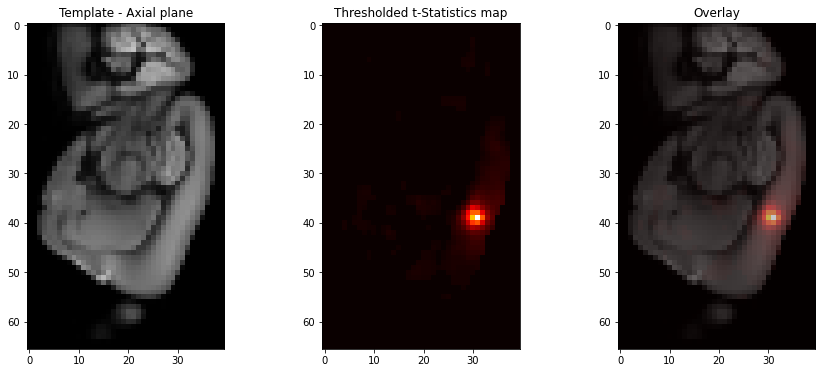

In [192]:
import numpy as np
import matplotlib.pyplot as plt

slice_idx = 18

f, ccf_axes = plt.subplots(1, 3, figsize=(15, 6))

#print(template[0][slice_idx,:,:])
ccf_axes[0].imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ccf_axes[0].set_title("Template - Axial plane")

ccf_axes[1].imshow(tval_siga[slice_idx,:,:], cmap='hot', aspect='equal', vmin=0, vmax=tval_siga.max())
ccf_axes[1].set_title("Thresholded t-Statistics map")

ccf_axes[2].imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ccf_axes[2].imshow(tval_siga[slice_idx,:,:], cmap='hot', alpha=0.5, vmin=0, vmax=tval_siga.max())
ccf_axes[2].set_title("Overlay")

plt.show()

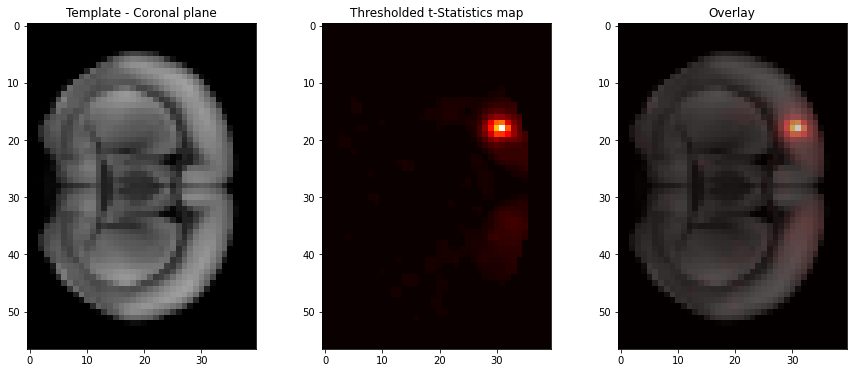

In [193]:
slice_idx = 39

f, ccf_axes = plt.subplots(1, 3, figsize=(15, 6))

#print(template[0][slice_idx,:,:])
ccf_axes[0].imshow(template[:,slice_idx,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ccf_axes[0].set_title("Template - Coronal plane")

ccf_axes[1].imshow(tval_siga[:,slice_idx,:], cmap='hot', aspect='equal', vmin=0, vmax=tval_siga.max())
ccf_axes[1].set_title("Thresholded t-Statistics map")

ccf_axes[2].imshow(template[:,slice_idx,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ccf_axes[2].imshow(tval_siga[:,slice_idx,:], cmap='hot', alpha=0.5, vmin=0, vmax=tval_siga.max())
ccf_axes[2].set_title("Overlay")

plt.show()

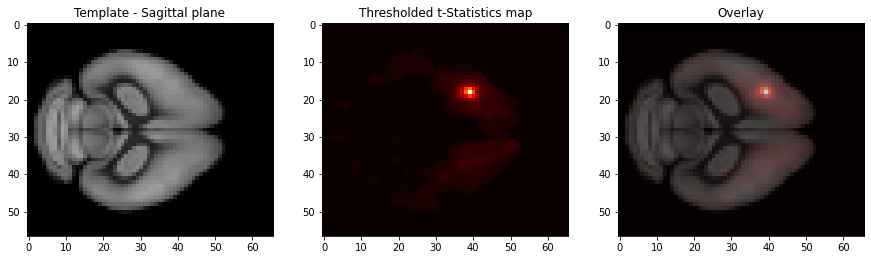

In [194]:
slice_idx = 31

f, ccf_axes = plt.subplots(1, 3, figsize=(15, 6))

#print(template[0][slice_idx,:,:])
ccf_axes[0].imshow(template[:,:,slice_idx], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ccf_axes[0].set_title("Template - Sagittal plane")

ccf_axes[1].imshow(tval_siga[:,:,slice_idx], cmap='hot', aspect='equal', vmin=0, vmax=tval_siga.max())
ccf_axes[1].set_title("Thresholded t-Statistics map")

ccf_axes[2].imshow(template[:,:,slice_idx], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ccf_axes[2].imshow(tval_siga[:,:,slice_idx], cmap='hot', alpha=0.5, vmin=0, vmax=tval_siga.max())
ccf_axes[2].set_title("Overlay")

plt.show()